# Machine Failure Competition

*Created by: Taylor Daugherty*

*Created on: 6/19/2023    Last updated: 6/20/2023 - Clean up notebook*

This notebook contains code to make predictions for the Machine Failure competition. The notebook attempts to determine the best model to predict the probability of machine failure

**Input File:** train.csv and test.csv from the machine failure competition

- train.csv contains a training set of data with features and true values

- test.csv contains a testing set of data with only features. This is what will be used to make predictions and submit to the competition


**Purpose of notebook:** Gain more practice with feature engineering and make submissions to the machine failure competition

<img src="https://p0.pxfuel.com/preview/111/763/730/gears-engine-mechanical-engineering.jpg" alt="Titanic" width="600"/>

## Table of Contents

1. **Universal Application**

    a. Imports
    
    b. Lists
    
    b. Functions

2. **Models**

    a. Without Age
    
    b. With Age

## Results

The highest scoring model of the notebook scored **0.95105** in the competition. This was achieved by using a Linear Regression Model and scaling the results to between 0 and 1

This can be found using the following sections:

    ML Models > Models With Age > Fill Age with Mean

# Universal Application

In this section is all of the code that is universally applicable throughout the notebook. This includes imports, lists, and functions that make the code much more readable

## Contents:

1. Import Packages

2. Imputing values

3. Lists

3. Functions

## Import packages

These packages are necessary for this notebook to run

- `numpy` for linear algebra

- `pandas` for dataframes

- `seaborn` for plotting

- `matplotlib.pyplot` for plotting

- `LogisticRegression` for modeling

- `KNeighbors Classifier` for modeling

- `SVC` for modeling

- `StratifiedKFold` and `cross_val_score` for cross-validation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

## Dataframes

This stores a basic dataframe for the training and testing sets

In [2]:
train_filepath = '/kaggle/input/playground-series-s3e17/train.csv'
test_filepath = '/kaggle/input/playground-series-s3e17/test.csv'

df_train = pd.read_csv(train_filepath, index_col='id')
df_test = pd.read_csv(test_filepath, index_col='id')

## Models

These are the models that will be used during cross validation

In [3]:
models = []

models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))

In [4]:
scaler = MinMaxScaler((0, 1))

## Functions

Functions make the notebook more readable and reduce the length of the notebook.

### map_cat()

Turns features containing categorical data to numeric data through the use of a mapping dictionary.

**Inputs:**

- Dataframe for the mapping to take place in

- List of features that contain categorical data

- List of dictionaries to govern how to map the feature

**Output:** A dataframe with the given features mapped according to the dictionaries

In [5]:
def map_cat(df, features, dictionaries):
    '''
    Map categorical data to be numeric
    
    Input:
        - Dataframe for the mapping to take place in
        - List of features that contain categorical data
        - List of dictionaries to govern how to map the feature
    
    Output: A dataframe with the given features mapped according to the dictionaries
        
    '''
    df_mapped = df
    
    for i in range(len(features)):
        feature = features[i]
        dictionary = dictionaries[i]
        
        df_mapped[feature] = df[feature].map(dictionary)
        
    return df_mapped

### drop_features()

Drop a list of features from a dataframe

**Input:**

- A dataframe to remove the features from

- A list of features to remove from the dataframe
        
**Output:** A dataframe without the listed features

In [6]:
def drop_features(df, d_features):
    '''
    Drops a list of features from a dataframe
    
    Input:
        - A dataframe to remove the features from
        - A list of features to remove from the dataframe
        
    Output: A dataframe without the listed features
    '''
    df_dropped = df
    
    for feature in d_features:
        df_dropped = df_dropped.drop(str(feature), axis=1)
        
    return df_dropped

### normalize()

Normalizes datapoints in a Series

**Input:** A feature of type Series
    
**Output:** The normalized feature of type Series

In [7]:
def normalize(feature):
    '''
    This function normalizes a Series
    
    Input: A feature of type Series
    
    Output: The normalized feature of type Series
    '''
    return (feature - feature.mean())/feature.std()

### normalize_features()

Normalizes all features in a dataframe

**Input:** A pandas dataframe

**Output:** A normalized dataframe

In [8]:
def normalize_features(df):
    '''
    This function normalizes all features in a dataframe
    
    Input: A pandas dataframe
    
    Output: The normalized dataframe
    '''
    for column in df.columns:
        df[column] = normalize(df[column])
    return df

### perform_cross_validation()

This function goes through the steps to perform Stratified K-fold cross validation using the list of models described above.
    
**Input:**
- A dataframe containing the features use to build the model
- A Series of the true values associated with the feature list
    
**Output:** Printed result for the mean and standard deviation of each model

In [9]:
def perform_cross_validation(X_train, y_train):
    '''
    This function goes through the steps to perform Stratified K-fold cross validation using the list of models described above.
    
    Input: 
        - A dataframe containing the features use to build the model
        - A Series of the true values associated with the feature list
    
    Output: Printed result for the mean and standard deviation of each model
    '''
    results = dict()

    for name, model in models:
        kfold = StratifiedKFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results[name] = (cv_results.mean(), cv_results.std())

    print('Model\t\tCV Mean\t\tCV std')
    print(results)

In [10]:
def test_model(model, evaluation, X_trn, X_tst, y_trn, y_tst):
    clf = model.fit(X_trn, y_trn)
    pred = clf.predict(X_tst)
    accuracy = evaluation(y_tst, pred)
    return accuracy

In [11]:
def test_models(X_trn, X_tst, y_trn, y_tst):
    acc_LNR = test_model(LinearRegression(), mean_absolute_error, X_trn, X_tst, y_trn, y_tst)
    acc_LGR = test_model(LogisticRegression(), accuracy_score, X_trn, X_tst, y_trn, y_tst)
    acc_SVM = test_model(SVC(), accuracy_score, X_trn, X_tst, y_trn, y_tst)
    acc_KNN = test_model(KNeighborsClassifier(), accuracy_score, X_trn, X_tst, y_trn, y_tst)
    
    print('Accuracies:')
    print('Linear Regression:\t', (acc_LNR))
    print('Logistic Regression:\t', (acc_LGR))
    print('SVM:\t\t\t', (acc_SVM))
    print('KNN:\t\t\t', (acc_KNN))

# Data Analysis

Look at the dataframe to find potential errors and determine what features will be useful.

## View Contents

Get a better understanding of the dataset by viewing characteristics of the training and testing dataframes

### View the first few rows of the dataframes

In [12]:
df_train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,,
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [13]:
df_test.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
id,,,,,,,,,,,,
136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


### View null values

Look at the training and testing set for null values

In [14]:
df_train.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [15]:
df_test.isnull().sum()

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Value counts

Look at features to determine how many of each point is in the feature

In [16]:
df_train['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

In [17]:
df_train['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

### Transform categorical data

Convert categorical data to numeric by mapping

In [18]:
df_train = map_cat(df_train, ['Type'], [{'H':0, 'M':1, 'L':2}])
df_test = map_cat(df_test, ['Type'], [{'H':0, 'M':1, 'L':2}])

### View statistics

Look at the statistics of each dataframe to get a better understanding if the training and testing set behave similarly

In [19]:
df_train.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,1.633524,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,0.602480,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_test.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,1.631715,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,0.603467,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,2.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Correlation Heatmap

View a heatmap of the correlations between all numeric features. This will give insight to what features to use when creating a model

/tmp/ipykernel_20/3589342651.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_train.corr(), annot=True)


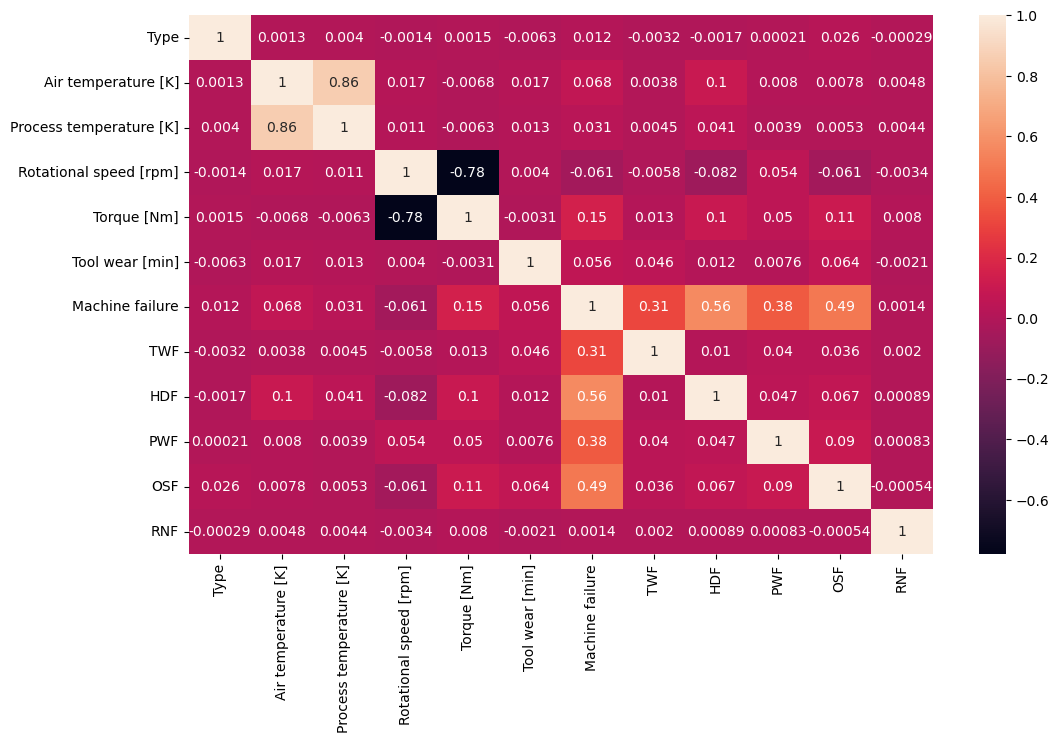

In [21]:
plt.figure(figsize=(12, 7))
dataplot = sns.heatmap(df_train.corr(), annot=True)
plt.show()

### Conclusion

The results of this heatmap can be used to determine what features will be the most useful in creating a machine learning model

#### Machine Failure Associations:

These are the features that machine failure is most closely related to

- TWF

- HDF

- PWF

- OSF

- Torque

- Air temperature
- Rotational speed

#### Additional Associations:

Machine failure can also be predicted by what associated features have connections to.

OSF has correlation with Tool Wear

#### Features to Keep

Based on this analysis, a list of all features to keep can be made.

- TWF

- HDF

- OSF

- Torque

- Air temperature

- Rotational speed

- Tool wear

# Machine Learning Models



## Basic Model

This model will be created using all features in the dataframe.

This is to see how a model performs without attempting to optimize its performance.

### Prepare dataframes

Make adjustments to the training and testing dataframes so that it is ready to be split into features and target and build a model.

1. Import dataframe: Read in the dataframes from their filepaths

2. Map features: Map the 'Type' feature so that it contains numerical data

3. Drop features: Remove the 'Product ID' feature since it does not contain useful information for making predictions

In [22]:
df_train_all = pd.read_csv(train_filepath, index_col='id')
df_test_all = pd.read_csv(test_filepath, index_col='id')

df_train_all = map_cat(df_train_all, ['Type'], [{'H':0, 'M':1, 'L':2}])
df_test_all = map_cat(df_test_all, ['Type'], [{'H':0, 'M':1, 'L':2}])

df_train_all = drop_features(df_train_all, ['Product ID'])
df_test_all = drop_features(df_test_all, ['Product ID'])

### Normalize features

Normalizing features helps reduce the bias that different feature ranges have on creating a model. Performing this step should improve the accuracy of the model.

1. Divide training data: Separate the training dataframe to features and target (Machine failure)

2. Normalize: Normalize the features and the testing dataframe

In [23]:
X_all = df_train_all.drop('Machine failure', axis=1)
y_all = df_train_all['Machine failure']

X_all_norm = normalize_features(X_all)
df_test_all_norm = normalize_features(df_test_all)

### Further divide training data

Use `train_test_split()` to divide the training data into training and validation datasets

In [24]:
X_all_train, X_all_val, y_all_train, y_all_val = train_test_split(X_all_norm, y_all)

### Evaluate models

Test the data using all models that could be used

Uncomment to see results

In [25]:
# test_models(X_all_train, X_all_val, y_all_train, y_all_val)

## Models with Feature Engineering

These models will use the insights gained from data exploration to optimize the model.

### Basic Feature Engineering

The only change made in this submission is removing the features that were found to not relate to machine failure during data exploration

#### Import dataframe

Read in the dataframes from their filepaths

In [26]:
df_train_fe = pd.read_csv(train_filepath)
df_test_fe = pd.read_csv(test_filepath)

#### Drop features

Remove the 'Product ID', 'Type', and 'RNF features since it does not contain useful information for making predictions

In [27]:
drop_f = ['Product ID', 'Type', 'RNF']

df_train_fe = drop_features(df_train_fe, drop_f)
df_test_fe = drop_features(df_test_fe, drop_f)
df_train_fe.head()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF
0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,3,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,4,298.0,309.0,1641,35.4,34,0,0,0,0,0


#### Normalize features

Normalizing features helps reduce the bias that different feature ranges have on creating a model. Performing this step should improve the accuracy of the model.

1. Divide training data: Separate the training dataframe to features and target (Machine failure)

2. Normalize: Normalize the features and the testing dataframe

In [28]:
X_fe = df_train_fe.drop('Machine failure', axis=1)
y_fe = df_train_fe['Machine failure']

X_fe_norm = normalize_features(X_fe)
df_test_fe_norm = normalize_features(df_test_fe)

X_fe_norm.head()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF
0,-1.732032,0.395879,-0.246229,0.545414,-0.499709,0.556415,-0.03945,-0.07202,-0.049016,-0.063038
1,-1.732006,1.469850,1.558599,1.720302,-1.323023,1.494427,-0.03945,-0.07202,-0.049016,-0.063038
2,-1.731981,-0.302203,-1.040354,2.051865,-1.628825,-1.241442,-0.03945,-0.07202,-0.049016,-0.063038
3,-1.731956,0.610673,0.692281,0.026445,0.464744,1.447527,-0.03945,-0.07202,-0.049016,-0.063038
4,-1.731930,-1.000284,-0.679388,0.869769,-0.582041,-1.100740,-0.03945,-0.07202,-0.049016,-0.063038


#### Further divide training data

Use `train_test_split()` to divide the training data into training and validation datasets

In [29]:
X_fe_train, X_fe_val, y_fe_train, y_fe_val = train_test_split(X_fe_norm, y_fe)

#### Evaluate models

Test the data using all models that could be used

Uncomment to see results

In [30]:
# test_models(X_fe_train, X_fe_val, y_fe_train, y_fe_val)

#### Make Predictions

There will be two submissions using this method, since it is unclear at this moment whether a classification or regression model will yield the most accurate results when used in the competition.

##### Logistic Regression

This tied for the highest accuracy with SVM when testing models. Logistic Regression ran much faster than SVM, so it was chosen to make predictions

In [31]:
clf_LGR = LogisticRegression().fit(X_fe_train, y_fe_train)
pred_test_LGR = clf_LGR.predict(df_test_fe_norm)

df_submission_LGR = pd.DataFrame(data={'Machine failure':pred_test_LGR}, index=df_test_fe_norm.index)
df_submission_LGR.to_csv('Machine_Failure_Submission-LGR-2023_6_19.csv')

The submission had a public score of **0.91258**

##### Linear Regression

This was the only regression model tested, so it will be used to make predictions

In [32]:
clf_LNR = LinearRegression().fit(X_fe_train, y_fe_train)
pred_test_LNR = clf_LNR.predict(df_test_fe_norm)

df_submission_LNR = pd.DataFrame(data={'Machine failure':pred_test_LNR}, index=df_test_fe_norm.index)
df_submission_LNR.to_csv('Machine_Failure_Submission-LNR-2023_6_19.csv')

The submission had a public score of **0.95033**

#### Conclusion

There is a clear winner between classification and regression models: **regression wins!**

In the public scoring system, the regression model scored roughly 4% higher.

In future submissions, a regression model will be used to make predictions

## Improve Linear Regression Model

The linear regression model could be improved. 

View range of previous submission

In [33]:
df_submission_LNR.describe()

,Machine failure
count,90954.000000
mean,0.015727
std,0.104495
min,-0.029191
25%,0.001573
50%,0.004117
75%,0.007245
max,2.645912


This description shows that the probabilities fall in a range that includes values that are impossible to achieve. The accuracy score on the test set can be improved by fitting the data into a range between 0 and 1.

### Linear Regression 2

Use the results from Linear Regression model 1 and scale the results to fit within 0 and 1.

The method that will be used for this submission is a threshold at 0 and 1 where all values greater than 1 are rounded down to 1 and all values less than 0 are rounded up to 0.

This should improve the results since the results will have a similar distribution, but fit into the range of valid values

Apply the transformation

In [34]:
df_submission_LNR_2 = df_submission_LNR.copy()
df_submission_LNR_2.loc[df_submission_LNR["Machine failure"] > 1, "Machine failure"] = 1
df_submission_LNR_2.loc[df_submission_LNR["Machine failure"] < 0, "Machine failure"] = 0
df_submission_LNR_2.describe()

,Machine failure
count,90954.000000
mean,0.015369
std,0.095817
min,0.000000
25%,0.001573
50%,0.004117
75%,0.007245
max,1.000000


Format the dataframe into a `.csv` file to submit to the competition

In [35]:
df_submission_LNR_2.to_csv('Machine_Failure_Submission-LNR_2-2023_6_19.csv')

### Conclusion

The submission had a public score of **0.95083**

## Linear Regression 3

Use the results from Linear Regression model 1 and scale the results to fit within 0 and 1.

The method that will be used for this submission is a `MinMaxScaler()` to maintain a similar distribution as the original predictions

This should improve the results since the results will have a similar distribution, but fit into the range of valid values

Apply the transformation

In [36]:
df_submission_LNR_3 = df_submission_LNR.copy()
df_submission_LNR_3['Machine failure'] = scaler.fit_transform(df_submission_LNR_3)
df_submission_LNR_3.describe()

,Machine failure
count,90954.000000
mean,0.016791
std,0.039062
min,0.000000
25%,0.011500
50%,0.012451
75%,0.013620
max,1.000000


Format the dataframe into a `.csv` file to submit to the competition

In [37]:
df_submission_LNR_3.to_csv('Machine_Failure_Submission-LNR_3-2023_6_19.csv')

### Conclusion

The submission had a public score of **0.95105**